### Regression Models with keras

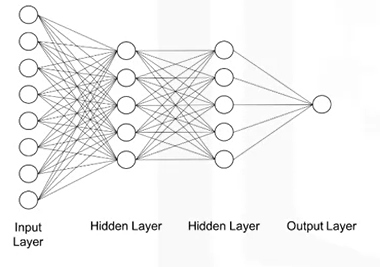

In [2]:
import pandas as pd

df = pd.read_csv('C:\\Users\\LENOVO\\OneDrive\\Desktop\\concrete_data.csv', encoding = 'latin-1')
df.head()

# df.describe() 

# df.shape

# df.isnull().sum()

"The target variable is the concreate sample strength"
predictors = df.drop(columns = ['Strength'])
target = df['Strength'].values

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.

In [3]:
predictors_norm = (predictors - predictors.mean())/predictors.std()

Let's save the number of predictors to *n_cols* since we will need this number when building our network.

In [4]:
n_cols = predictors_norm.shape[1]

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense

#define a regression model
def regression_model():
    
    model = Sequential()
    model.add(Dense(50, activation = 'relu', input_shape = (n_cols, ))) # First Hidden layer
    model.add(Dense(50, activation = 'relu'))  # Second hidden layer
    model.add(Dense(1))  # Ouptut layer

    'Optimizing the model'
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    "Returns a model with 2 hidden layers and one output layer. Each of the hidden layers have 50 nodes"
    return model   

# Training the model
"""Next, we will train and test the model at the same time using the fit method.
We will leave out 30% of the data for validation and we will train the model for 100 epochs"""

model = regression_model()
model.fit(predictors, target, validation_split = 0.3, epochs = 10, verbose = 2)

Epoch 1/10
23/23 - 1s - loss: 3483.4441 - val_loss: 884.9538 - 857ms/epoch - 37ms/step
Epoch 2/10
23/23 - 0s - loss: 438.4084 - val_loss: 233.8671 - 70ms/epoch - 3ms/step
Epoch 3/10
23/23 - 0s - loss: 201.3506 - val_loss: 159.0254 - 67ms/epoch - 3ms/step
Epoch 4/10
23/23 - 0s - loss: 154.1139 - val_loss: 110.9768 - 59ms/epoch - 3ms/step
Epoch 5/10
23/23 - 0s - loss: 132.7495 - val_loss: 101.2972 - 63ms/epoch - 3ms/step
Epoch 6/10
23/23 - 0s - loss: 118.4149 - val_loss: 89.2029 - 61ms/epoch - 3ms/step
Epoch 7/10
23/23 - 0s - loss: 116.4400 - val_loss: 78.9404 - 63ms/epoch - 3ms/step
Epoch 8/10
23/23 - 0s - loss: 113.5884 - val_loss: 78.3270 - 58ms/epoch - 3ms/step
Epoch 9/10
23/23 - 0s - loss: 113.1044 - val_loss: 76.7088 - 63ms/epoch - 3ms/step
Epoch 10/10
23/23 - 0s - loss: 107.9217 - val_loss: 79.7159 - 64ms/epoch - 3ms/step
